In [1]:
#Import all the neccessary library

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline


# Data Exploration 

In [2]:
# Read the automobile dataset and create a data frame.
automobile_df = pd.read_table("_automobile.txt", sep=",")

In [4]:
# View the first 5 rows of the dataset
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:

# View more information about the dataset 
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
# Statistical information of the data .

automobile_df.describe()


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# Data Cleaning

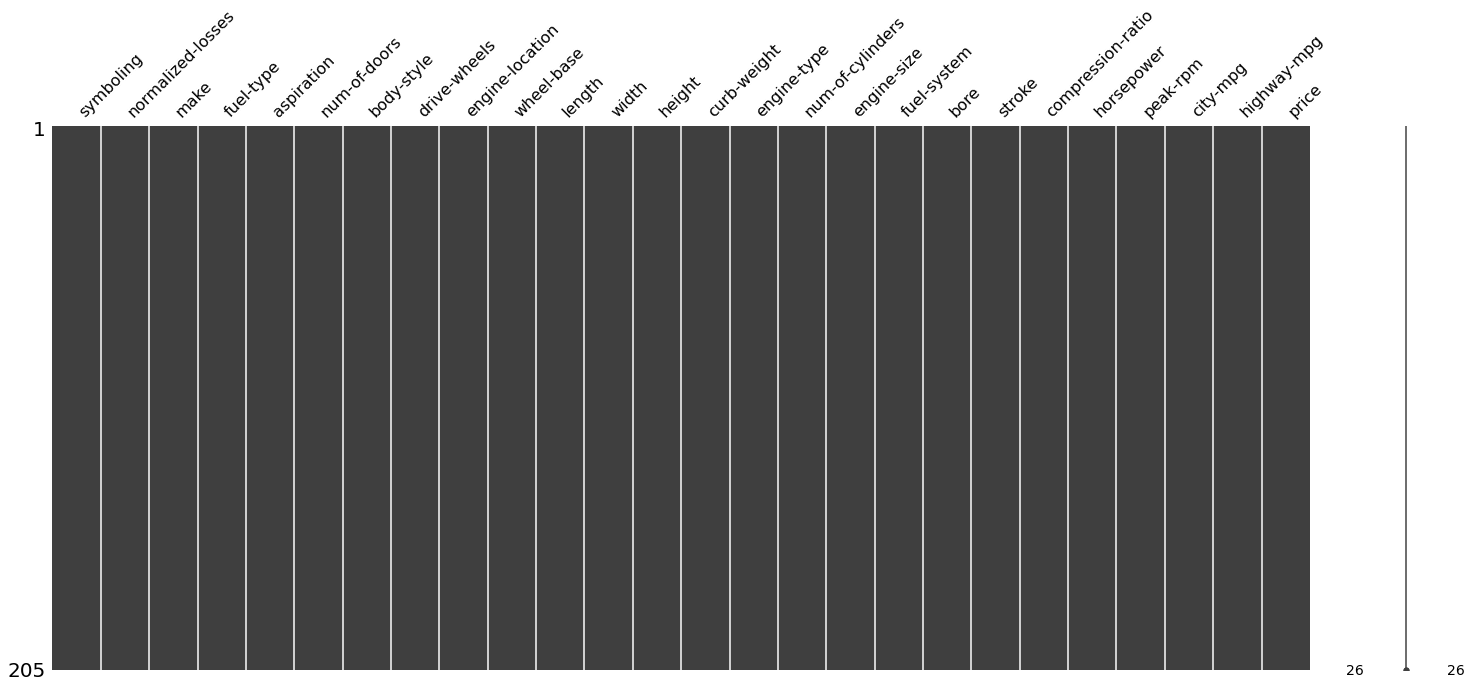

In [7]:
# Check missing data
missingno.matrix(automobile_df);

In [8]:
# Handle missing values and clean the data .

# Replace all the ? with 0 in the normalised column

automobile_df.replace('?',0,inplace=True)

# Change the normalised column from strings to integers .
def to_int(column):
    column = column.astype(np.int64)
    return column
to_int(automobile_df['normalized-losses'])


automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
# Check for duplicates
automobile_df.duplicated().sum()

0

In [10]:
# # Drop columns irrelevant for our anaylsis.
# automobile_df.drop(['aspiration','fuel-system'],axis=1,inplace=True)

# Rename some rows in the drive wheels colum
automobile_df['drive-wheels'] = automobile_df['drive-wheels'].map({'4wd': "fwd",'fwd':'fwd','rwd':'rwd'})

automobile_df['drive-wheels']
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,fwd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data Analysis and Visualization

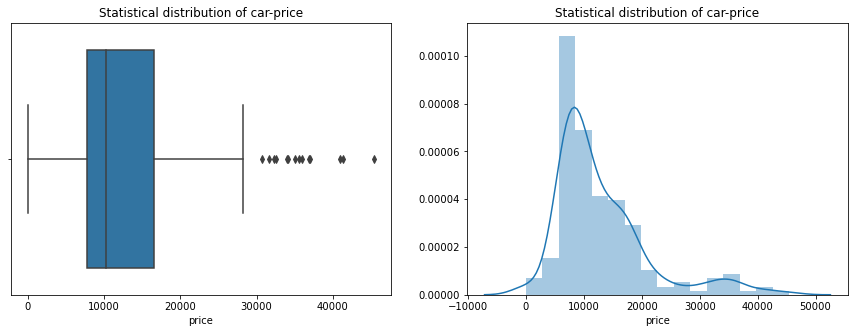

In [11]:
# Data distribution of car prize

# Plot and show the graph
#Boxplot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Statistical distribution of car-price")
sns.boxplot(to_int(automobile_df["price"]))

#Histogram
plt.subplot(1, 2, 2)
plt.title("Statistical distribution of car-price")
sns.distplot( a=to_int(automobile_df["price"]), hist=True, kde=True, rug=False )
plt.show()

We can see that the average cost a car within this dataset is 10000 . More so we have some outliers , that is the most expensive car in the dataset ,costing above 40 000 and the cheapest car costing 500. We are can also see some statistical information about prices in the boxplot . The IQR is 2900 ,mean 10000 . This distribution will help us as we try to find the relationship of other features with price .

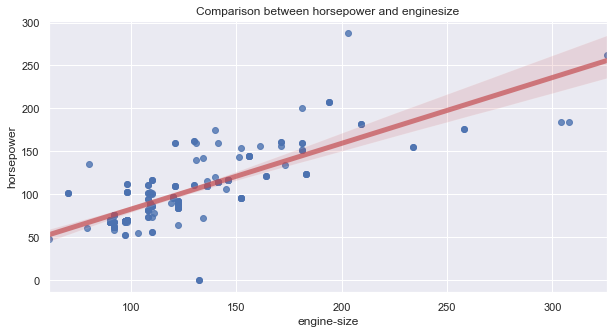

In [12]:
# Correlation between horspower and enginesize

#Set style of the graph
sns.set(style="darkgrid")

# Plot and show the graph
plt.figure(figsize=(10,5))
sns.regplot(x=automobile_df["engine-size"], y=to_int(automobile_df["horsepower"]), line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title('Comparison between horsepower and enginesize')
plt.show()

Here we try to determine the relationship of the horsepower of a car and its enginesize . There seem to be a strong relationship between these two features .An individual buying a car with a small engine size should also expect the horsepower to be small .

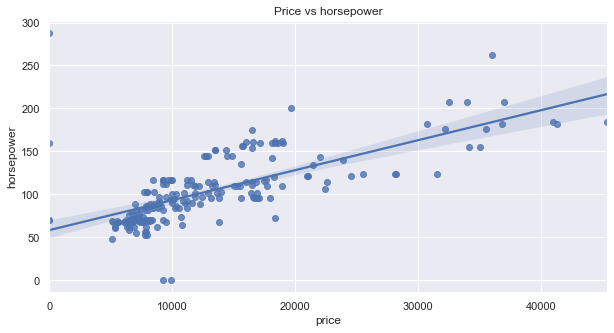

In [13]:
# Find the correlation between price and horsepower .

plt.figure(figsize=(10,5))
#Plot and show
sns.regplot(x=to_int(automobile_df["price"]), y=to_int(automobile_df["horsepower"]))
plt.title('Price vs horsepower')
plt.show()




Likewise a car with a big horsepower is more expensive than the car with small horsepower . Thus it can be concluded that the price ,horsepower and the enginesize are correlated . Horsepower and enginesize strongly influence the prize of the car . The graph below brings the point home . The greater the horsepower and the engine size , the higher the price of the car .

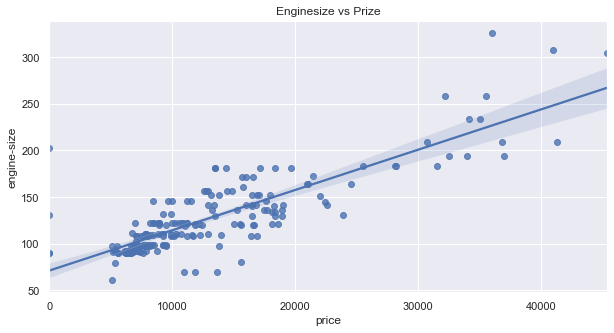

In [14]:
# Correlation between engine size and price
plt.figure(figsize=(10,5))
# Plot and show
sns.regplot(x=to_int(automobile_df["price"]), y=to_int(automobile_df["engine-size"]))
plt.title('Enginesize vs Prize')
plt.show()

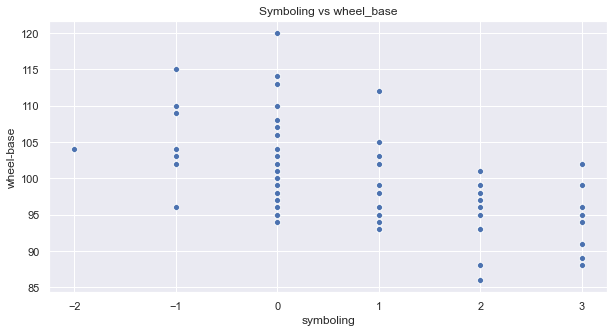

In [15]:
# Find out how symobling and wheel base correlate .

plt.figure(figsize=(10,5))

# Plot and show
sns.scatterplot(automobile_df["symboling"], to_int(automobile_df["wheel-base"]))
plt.title('Symboling vs wheel_base')
plt.show()

# plt.hist(x=automobile_df["symboling"],y=to_int(automobile_df["wheel-base"]))
# plt.show()

Analysing these two features can help us understand to what extend the wheelbase of a car affects symboling .Symbolling determines how risky a car is . Thus , from this graph it be concluded that the bigger the wheelbase the more safer the car is . The lesser the wheelbase , the more risky the car is . This point is clearly explained in the report .

For a consumer this information can help in deciding which car to buy and for what purpose ? if the car is going to be used in places where its risky (racing for instance),a bigger wheel base will be of help .

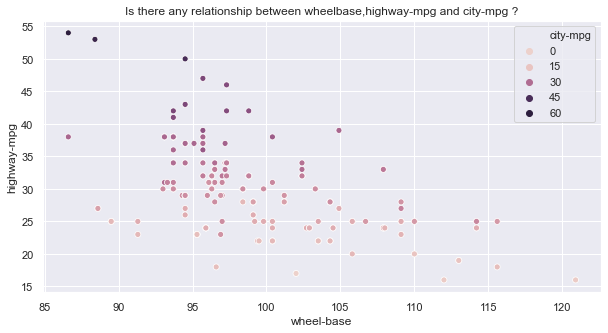

In [16]:
# Find the relationship between wheelbase and mpg

# Create a function that converts a colum into float data type
def to_float(column):
    column = column.astype(np.float64)
    return column

# Plot and show the graph
plt.figure(figsize=(10,5))
plt.title('Is there any relationship between wheelbase,highway-mpg and city-mpg ?')
to_float(automobile_df['bore'])
sns.scatterplot(automobile_df['wheel-base'],to_float(automobile_df['highway-mpg']),hue= to_float(automobile_df['city-mpg']));


Can we find a relationship between mpg and the wheelbase of a car ?. What we can deduce is that , the greater the city mpg, the lesser the wheelbase vis-a-vis . We draw the same conclusion when anaylising highway mpg.

Below we find that city and highway mpg are strongly correlated .A car with a high city mpg will also have a higher highway mpg,this makes absolute sense . However we notice that the correlation of city mpg and prize is negative , which means that the  more the other ,the lesser the other . Therefore a car with a low mpg is very expensive , and this should be the same for highway mpg.

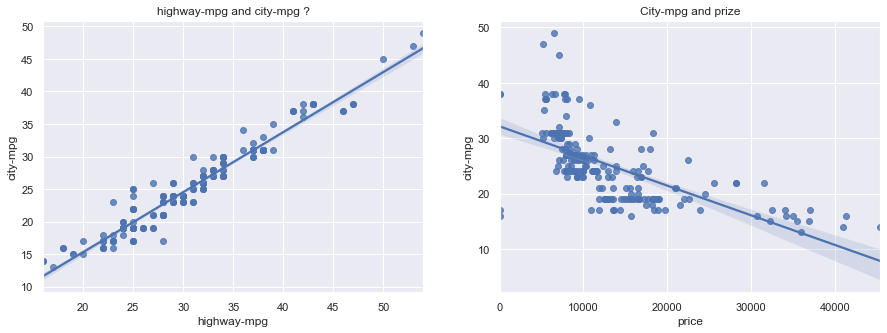

In [17]:
# Find the relationship between highway mpg,prize and city mpg
plt.figure(figsize=(15,5))

# Plot and show two graphs and find their relationship
#Find the relationship between highway and  city mpg
plt.subplot(1,2,1)
plt.title('highway-mpg and city-mpg ?')
sns.regplot(x=to_float(automobile_df['highway-mpg']),y=to_float(automobile_df['city-mpg']));

# Find relationship between city mpg and prize
plt.subplot(1,2,2)
plt.title("City-mpg and prize")
sns.regplot(x=to_float(automobile_df['price']),y=to_float(automobile_df['city-mpg']));

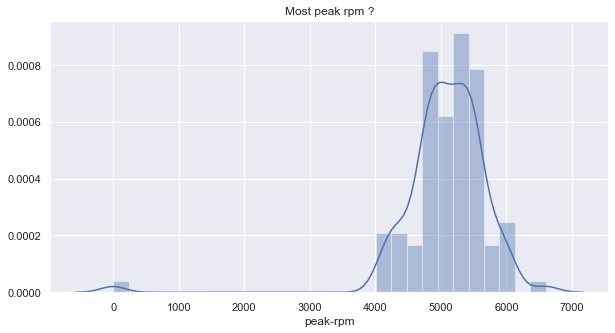

In [18]:

# Determine the most peakrpm

#Plot and show graph
plt.figure(figsize=(10,5))
plt.title('Most peak rpm ?')
sns.distplot( a=automobile_df["peak-rpm"], hist=True, kde=True, rug=False );

Insight : Average rpm for most of the cars in the dataset is 5000 . Outliers : 6500 and 1 .

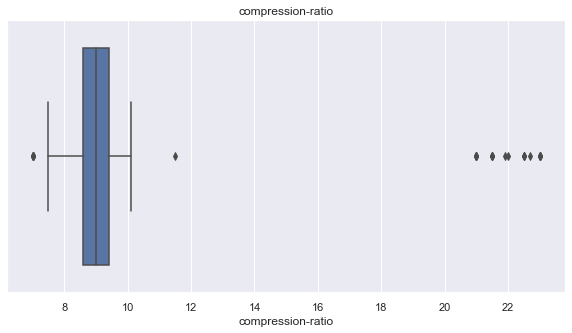

In [19]:
# View the data distribution of compression ratio.

#Plot and show
plt.figure(figsize=(10,5))
plt.title("compression-ratio")
sns.boxplot(automobile_df["compression-ratio"]);



What can we say about the distribution of compression ratio ? . Most cars in our dataset will have a compression rate of 7-10 . However we do find cars in the dataset with a ratio as high as 22. These are outliers . This graph help us understand how the compression ratio data varies , how far from the median(9) is and help us understand the IQR .

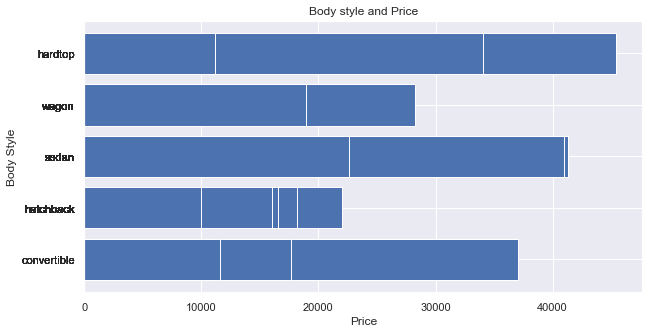

In [27]:
# Determine the most expensive bodystyle
height = to_int(automobile_df['price'])
y_pos = automobile_df['body-style']

plt.figure(figsize=(10,5))
plt.title('Body style and Price')
plt.xlabel("Price")
plt.ylabel("Body Style")
# Create horizontal bars

plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, automobile_df['body-style'])

plt.show()

Here we are trying to settle this question; does the body style of your car influence the prize of your car?. The answer is yes . Different body styles either makes the car expensive or cheap . In our dataset ,hardtop rules , its the most expensive whereas hatchbacks are pretty much affordable.

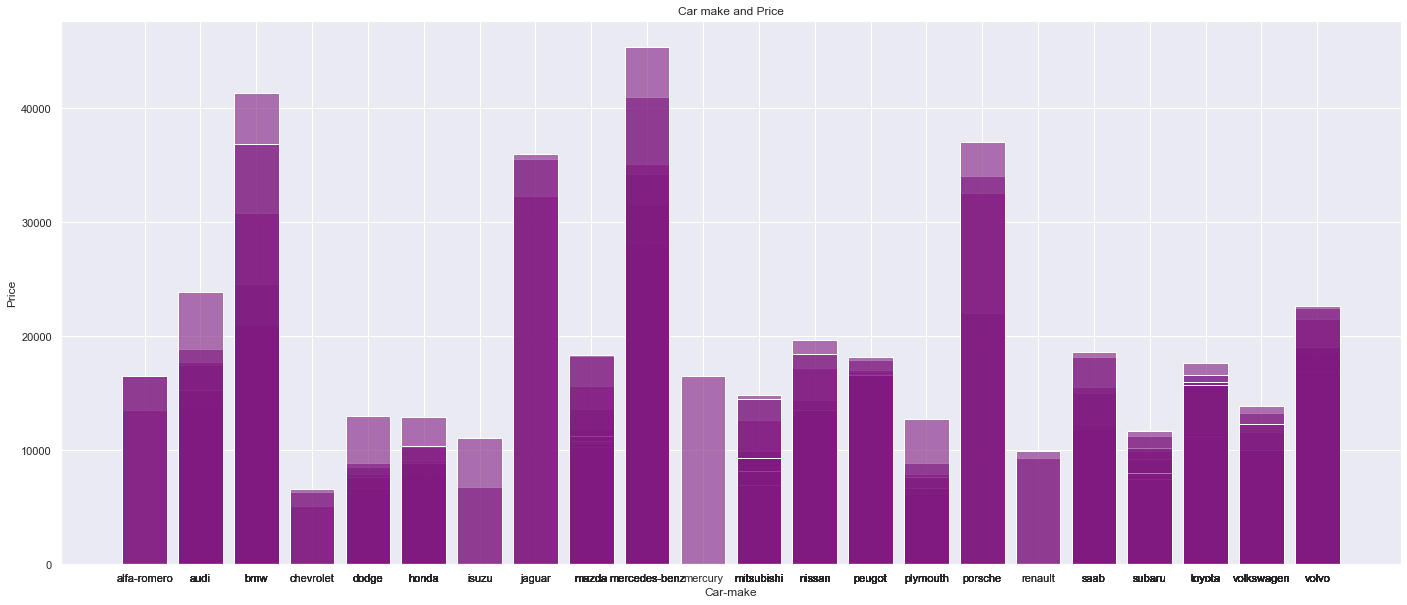

In [29]:
# Detemine the most expensive car make .

height =  to_int(automobile_df.price)
bars = automobile_df.make
x_pos = automobile_df.make

plt.figure(figsize=(24,10))
# Create bars and choose color

plt.bar(x_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Car make and Price')
plt.xlabel('Car-make')
plt.ylabel('Price')
 
# Create names on the x axis
plt.xticks(x_pos, bars)
 
# Show graph
plt.show()

Now that we have explored what types of body style is expensive .Can we determine the most expensive car ?.The graph above reveals the answer and shows us  all the cars we have and their respective prices .Benz and BMW are the most expensive cars .

In [30]:
automobile_df.columns # show columns of the dataset

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

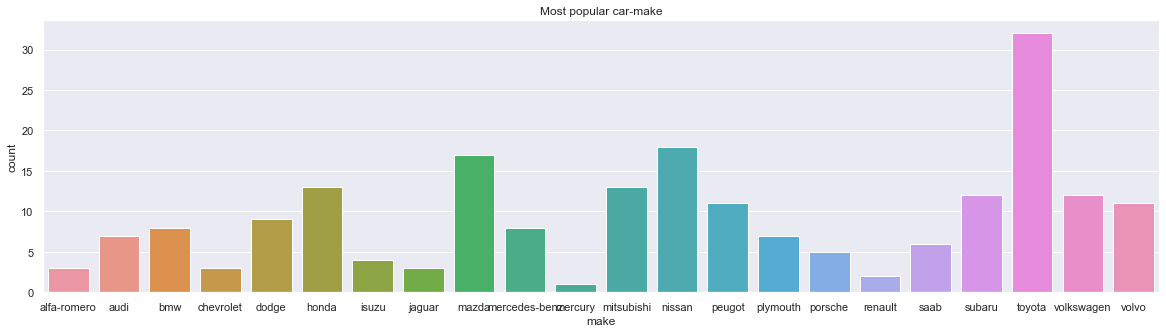

In [31]:
# Determine the most popular car make in our dataset.

plt.figure(figsize=(20,5))
plt.title('Most popular car-make')
sns.countplot(x =automobile_df.make, data = automobile_df)

# Show the plot
plt.show()

Benz may be the most expensive ,but is it the most popular car ?. It turns out that the fact the car is expensive slighlty affect its popularity. The most popular car is toyota which is not so expensive .Mercury is not so known by people . This insight can help perhaps in marketing for example , how can we make mercury a bit popular so that people can buy it ?. Or how can we improve the style of the car or its prize so that it can equal toyota's usage and popularity .

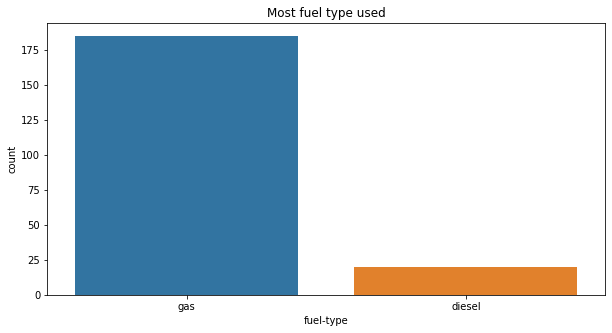

In [3]:
#Determine the most type of fuel used by cars in our dataset.

#Plot and show
plt.figure(figsize=(10,5))
plt.title('Most fuel type used')
sns.countplot(x =automobile_df['fuel-type'], data = automobile_df);

This is way simple . Gas is the most used fuel. This may aslo be helpful to business , for example fuel station . After seeing this data they will buy more of gas and less of diesel,because less than 25 cars use diesel .

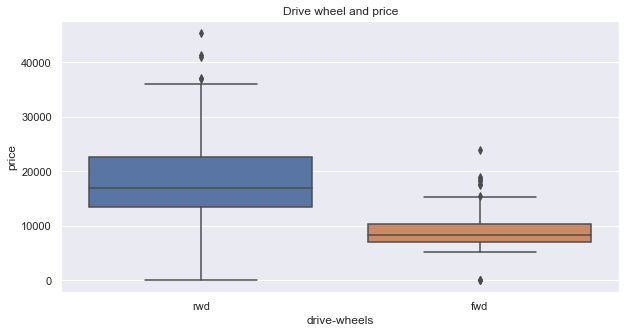

In [21]:
# Determine the data distribution of the drive wheel.

#Plot and show
plt.figure(figsize=(10,5))
plt.title("Drive wheel and price")
sns.boxplot(x= automobile_df["drive-wheels"],y = to_int(automobile_df["price"]));

This graph determine the statistical distribution of drive wheels of the cars in our dataset in relation to price . The average price for a rear wheel drive is 1800 while the average of the four wheel drive is 800 . Clearly rear wheel drive will cost more than fwd .

In our dataset  most cars are four wheel drives as shown below, however there are not expensive in relation to the rwd or out of the 205 cars .

In [33]:
automobile_df['drive-wheels'].describe() # Stastical information of drive wheels .

count     205
unique      2
top       fwd
freq      129
Name: drive-wheels, dtype: object